<a href="https://colab.research.google.com/github/CharlotteWetton/CE101_Group11/blob/main/Charlotte_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
print(train_data.head())
print(test_data.head())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
   PassengerId  Pclass  ...     Fare Embarked
0          892       3  ...   7.8292        Q
1          893       3  ...   7.0000        S
2          894       2  ...   9.6875        Q
3          895       3  ...   8.6625        S
4          896       3  ...  12.2875        S

[5 rows x 10 columns]


In [18]:
print('lenght of data is', len(test_data))

lenght of data is 418


Identifying and removing useless values

In [19]:
#functin to calc percentage of missing values in each column
def missing_percent(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percentage = round(total*100/len(df),2)
  return pd.concat([total,percentage], axis=1, keys=["Total", "Percentage"])

In [20]:
print(missing_percent(train_data))

             Total  Percentage
Cabin          687       77.10
Age            177       19.87
Embarked         2        0.22
Fare             0        0.00
Ticket           0        0.00
Parch            0        0.00
SibSp            0        0.00
Sex              0        0.00
Name             0        0.00
Pclass           0        0.00
Survived         0        0.00
PassengerId      0        0.00


### REMOVE CABIN COLUMN FROM TEST DATA- 77% is missing 

PLOT AGE GIVEN CLASS

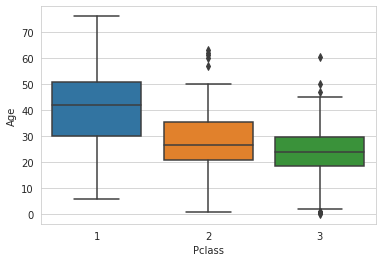

In [21]:
sns.set_style("whitegrid")
sns.boxplot(x='Pclass',y='Age',data=test_data)

Mean age in Pclass 1 is 42.
Mean age in Pclass 2 is 27.
Mean age in Pclass 3 is 25.

In [22]:
test_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [23]:
print(test_data.isnull().sum())
print('shape of train data: ',train_data.shape)

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64
shape of train data:  (891, 12)


PLOT OF SURVIVED - 
0 = NOT SURVIVED,  1 = SURVIVED


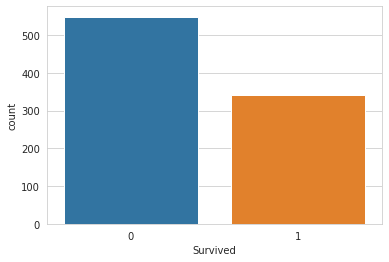

In [24]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

around 550 people did not survive and around 340 people survived out of 891

PLOT OF SURVIVED OR NOT WITH GENDER

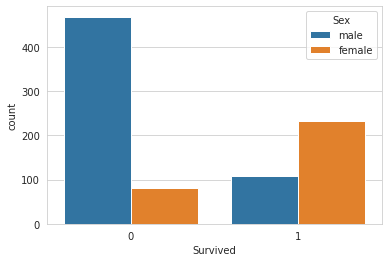

In [25]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data)

among all the males 470 did not survived and around 110 survived.
Out of all female around 85 did not survive and around 235 survived out of 891 (i.e. Train data).

PLOT OF SURVIVED AND GENDER GIVEN PCLASS

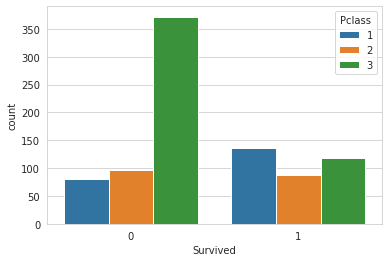

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data)

More number of Pclass 3 (Third class) passengers did not survive(around 370 passengers died).
More number of Pclass 1 (First class) passengers survived(around 140 passengers saved)

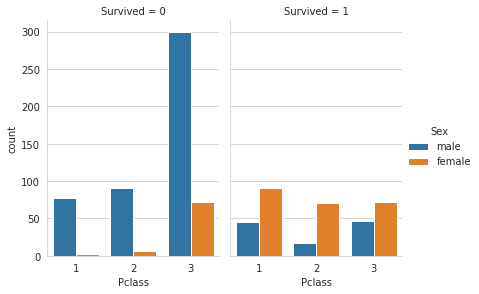

In [37]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data= train_data, kind="count",
                height=4, aspect=.7);
plt.show()

PERCENTAGES OF SURVIVED GIVEN CLASS AND GENDER

In [27]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


62.9% of Pclass 1 (First class) passengers survived.
47.3% of Pclass 2 (Second class) passengers survived.
24.2% of Pclass 3 (Third class) passengers survived.

In [28]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


74.2% of females survived.
18.8% of males survived.

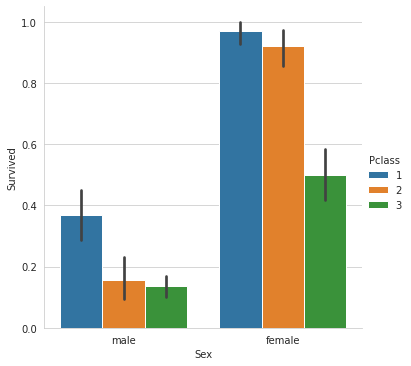

In [29]:
sns.catplot(x='Sex',y='Survived',hue='Pclass', kind='bar',data=train_data)

Around 38% of male & 95% of female survived in Pclass 1 (First class).
Around 16% of male & 90% of female survived in Pclass 2 (Second class).
Around 14% of male & 50% of female survived in Pclass 3 (Third class).

In [30]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


53.6% of passengers survived who is having 1 Sibling/Spouse.
No passenger survived with greater than 5 number of Sibling/Spouse.

In [31]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


60% of passengers survived who is having 3 number of parents/children on board.
No passenger survived with morethan 4 number of parents/children on board.

AGE PLOT OF SURVIVED

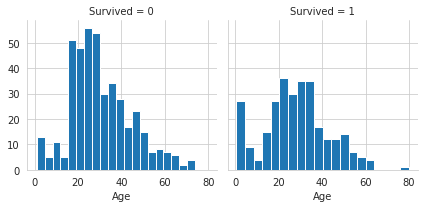

In [32]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

PLOT OF SURVIVED GIVEN CLASS AND SEX

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


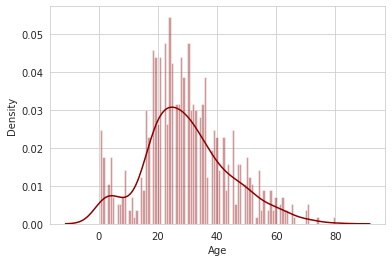

In [38]:
sns.distplot(train_data['Age'],kde=True,bins=100,color='darkred')


In [39]:
print(train_data.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


In [40]:
print(test_data.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [43]:
pd.get_dummies(train_data['Embarked'],drop_first=True).head()
pd.get_dummies(test_data['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [46]:
sex_1=pd.get_dummies(train_data['Sex'],drop_first=True)
embark_1=pd.get_dummies(train_data['Embarked'],drop_first=True)
sex_2=pd.get_dummies(test_data['Sex'],drop_first=True)
embark_2=pd.get_dummies(test_data['Embarked'],drop_first=True)

In [47]:
train_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
test_data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [48]:
train_data=pd.concat([train_data,sex_1,embark_1],axis=1)
test_data=pd.concat([test_data,sex_2,embark_2],axis=1)

In [49]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [50]:
# Correlation 
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
male,0.543351
Pclass,0.338481
Fare,0.257307
S,0.155660
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007
Q,0.003650
